In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('penguins_lter.csv')
df.shape

(344, 17)

In [102]:
# Calculate percentage of null values
total_cells = np.product(df.shape)
null_values = df.isnull().sum()
total_missing = null_values.sum()
percent_missing = (total_missing/total_cells)*100
print(F"{percent_missing:.2f}% of values are missing")

# Visualise missing values per column
print(f"\nMissing values per column:\n{null_values}")

# Drop columns not necessary for the analysis
df = df.drop(['Individual ID', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments', 'Region', 'Date Egg'], axis=1)

df.columns

6.21% of values are missing

Missing values per column:
studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64


Index(['studyName', 'Sample Number', 'Species', 'Island', 'Stage',
       'Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

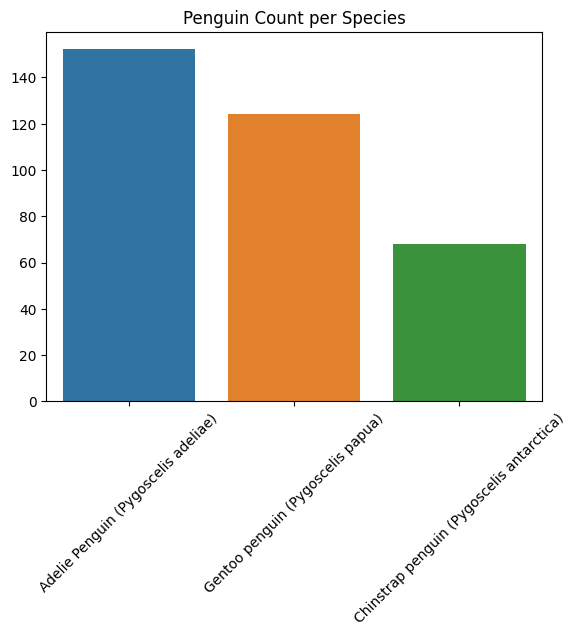

In [103]:
# Performing some exploratory analysis

# Visualising penguin population count per species
species_df = df['Species'].value_counts()

plt.figure()
sns.barplot(x=species_df.index, y=species_df.values)
plt.xticks(rotation=45)
plt.title(label='Penguin Count per Species')
plt.show()

Text(0.5, 1.0, 'Sex Count per Species')

<Figure size 640x480 with 0 Axes>

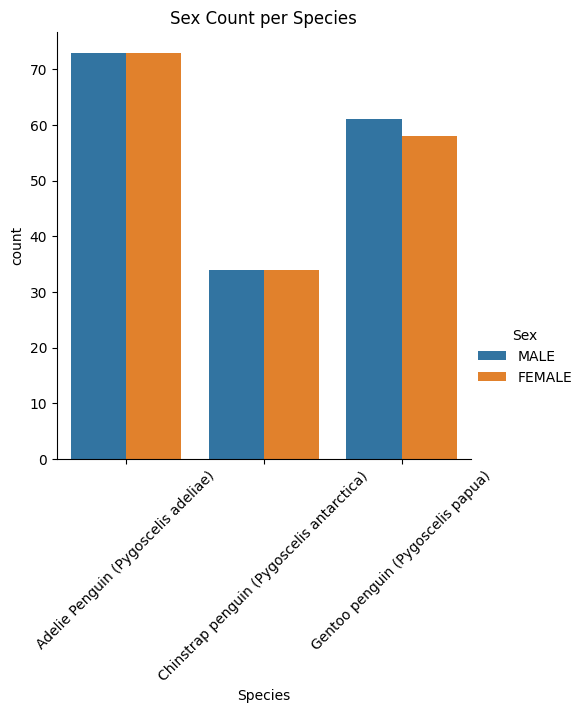

In [104]:
# Visualising sex of penguins

# Create a new dataframe with only the required columns and drop any missing values

species_sex_df = df[['Species', 'Sex', 'Clutch Completion']].dropna()
species_sex_df = species_sex_df[species_sex_df['Sex'] != '.']

# Use catplot to visualise sex per species

plt.figure()
sns.catplot(x='Species', hue='Sex', kind='count', data=species_sex_df)
plt.xticks(rotation=45)
plt.title(label='Sex Count per Species')

As expected, the sex of each species of penguin is very similar. The bar graph also reflects the difference in overall population between each species, where Chinstrap penguins are the least populous and Adelie penguins are the most populous.

<Figure size 640x480 with 0 Axes>

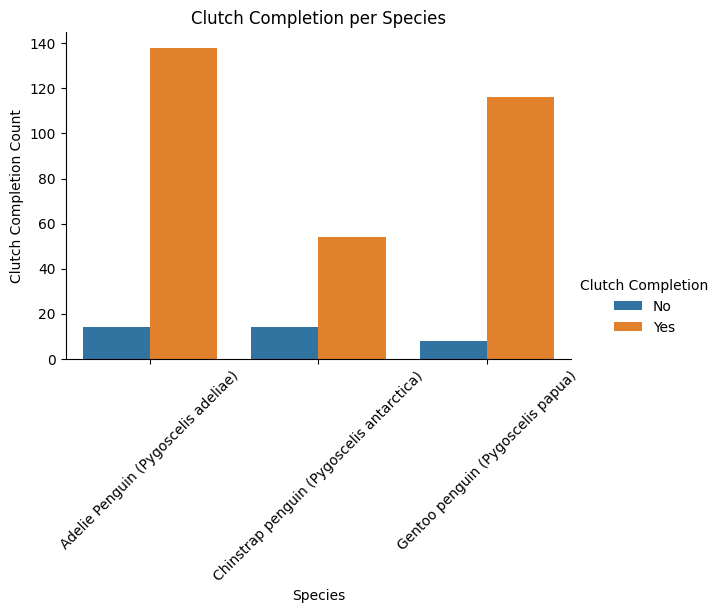

In [105]:
species_df = df.groupby(['Species', 'Clutch Completion'])['Clutch Completion'].count().reset_index(name='Count')
species_df = species_df.fillna(0)

plt.figure()
sns.catplot(x='Species', y='Count', hue='Clutch Completion', kind='bar', data=species_df, height=4, aspect=1.5)
plt.ylabel("Clutch Completion Count")
plt.title('Clutch Completion per Species')
plt.xticks(rotation=45)
plt.show()

The graph shows that rates of clutch completion are correlated to penguin population, yet interestingly rates of clutch non-completion are largely similar across each penguin species.

Adelie penguin clutch completion rate: 90.79
Chinstrap penguin clutch completion rate: 79.41
Gentoo penguin clutch completion rate: 93.55
----------------------------------------------
Torgersen island clutch completion rate: 84.62
Biscoe island clutch completion rate: 94.05
Dream island clutch completion rate: 85.48


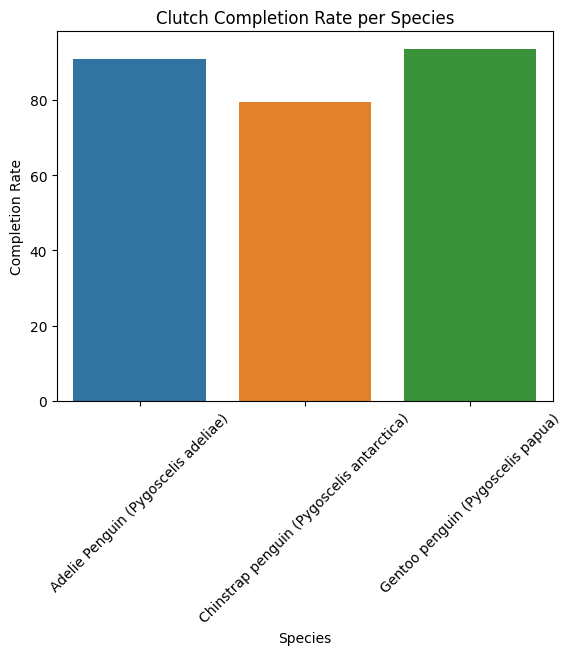

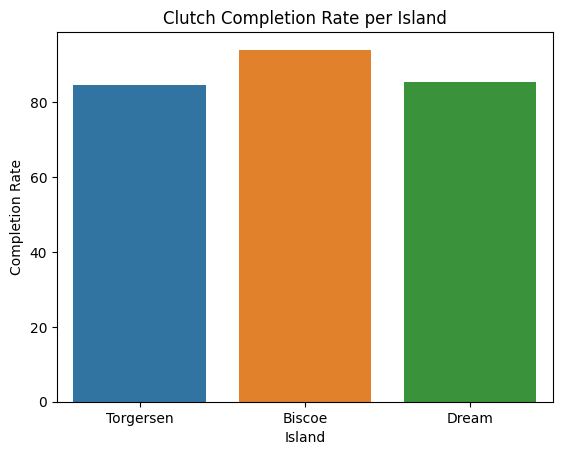

In [110]:
# Calculate clutch completion rate per species

adelie_df = df[df['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
yes_count = (adelie_df['Clutch Completion'] == 'Yes').sum()
total = len(adelie_df)
adelie_completion_rate = (yes_count / total) * 100
print(f"Adelie penguin clutch completion rate: {adelie_completion_rate:.2f}")

chinstrap_df = df[df['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)']
yes_count = (chinstrap_df['Clutch Completion'] == 'Yes').sum()
total = len(chinstrap_df)
chinstrap_completion_rate = (yes_count / total) * 100
print(f"Chinstrap penguin clutch completion rate: {chinstrap_completion_rate:.2f}")

gentoo_df = df[df['Species'] == 'Gentoo penguin (Pygoscelis papua)']
yes_count = (gentoo_df['Clutch Completion'] == 'Yes').sum()
total = len(gentoo_df)
gentoo_completion_rate = (yes_count / total) * 100
print(f"Gentoo penguin clutch completion rate: {gentoo_completion_rate:.2f}")

species_names = ['Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)']
completion_rates = [adelie_completion_rate, chinstrap_completion_rate, gentoo_completion_rate]
species_df = pd.DataFrame({'Species': species_names, 'Completion Rate': completion_rates})

print('----------------------------------------------')

# Calculate clutch completion rate per island

torgersen_df = df[df['Island'] == 'Torgersen']
yes_count = (torgersen_df['Clutch Completion'] == 'Yes').sum()
total = len(torgersen_df)
torgersen_completion_rate = (yes_count / total) * 100
print(f"Torgersen island clutch completion rate: {torgersen_completion_rate:.2f}")

biscoe_df = df[df['Island'] == 'Biscoe']
yes_count = (biscoe_df['Clutch Completion'] == 'Yes').sum()
total = len(biscoe_df)
biscoe_completion_rate = (yes_count / total) * 100
print(f"Biscoe island clutch completion rate: {biscoe_completion_rate:.2f}")

dream_df = df[df['Island'] == 'Dream']
yes_count = (dream_df['Clutch Completion'] == 'Yes').sum()
total = len(dream_df)
dream_completion_rate = (yes_count / total) * 100
print(f"Dream island clutch completion rate: {dream_completion_rate:.2f}")

island_names = ['Torgersen', 'Biscoe', 'Dream']
completion_rates = [torgersen_completion_rate, biscoe_completion_rate, dream_completion_rate]
islands_df = pd.DataFrame({'Island': island_names, 'Completion Rate': completion_rates})

# Visualise the data

plt.figure()
sns.barplot(x="Species", y="Completion Rate", data=species_df)
plt.title('Clutch Completion Rate per Species')
plt.xticks(rotation=45)
plt.show()

plt.figure()
sns.barplot(x="Island", y="Completion Rate", data=islands_df, hue_order=['Torgersen', 'Biscoe', 'Dream'])
plt.title('Clutch Completion Rate per Island')
plt.show()

In [107]:
# Function to create scatterplots of culmen length, depth, flipper length and body mass per species
def scatplot(column):
    species_df = df.groupby(['Species', column])['Clutch Completion'].count().unstack()
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="Body Mass (g)", y=column, hue="Species", alpha=0.7)
    plt.xlabel("Body Mass (g)")
    plt.ylabel(column)
    plt.title(f"{column} by Species")
    plt.show()

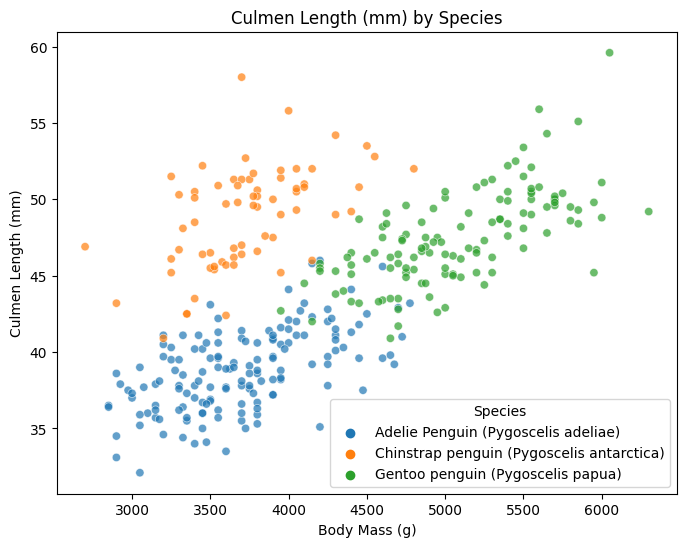

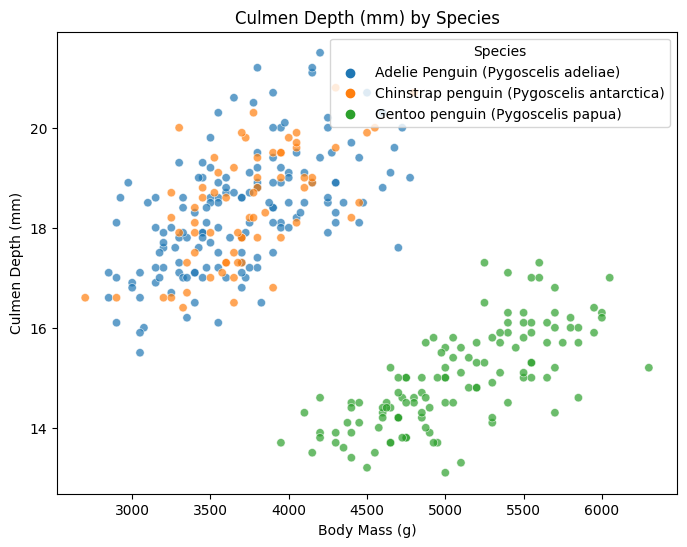

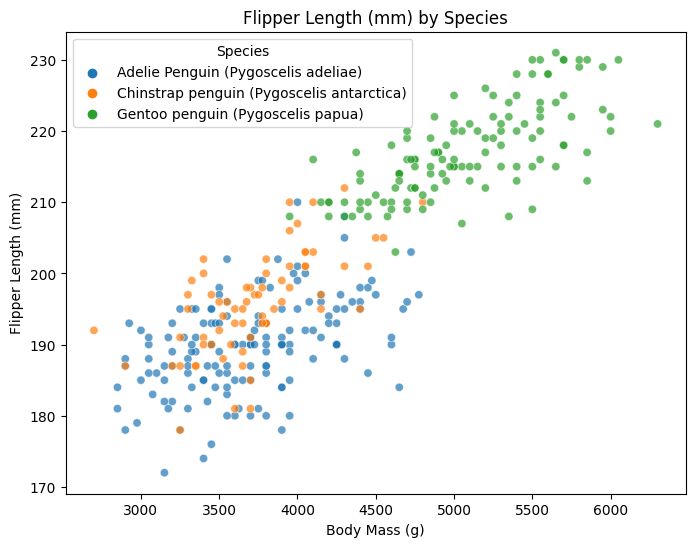

In [108]:
column_list = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']
for column in column_list:
    scatplot(column)

These graphs show that the Gentoo penguin has the largest body mass, longest flipper length and the shortest culmen depth of analysed penguin species. The Adelie and Chinstrap penguins have a similar body mass, flipper length and culmen depth, though the Chinstrap penguin has a consistently longer culmen length.

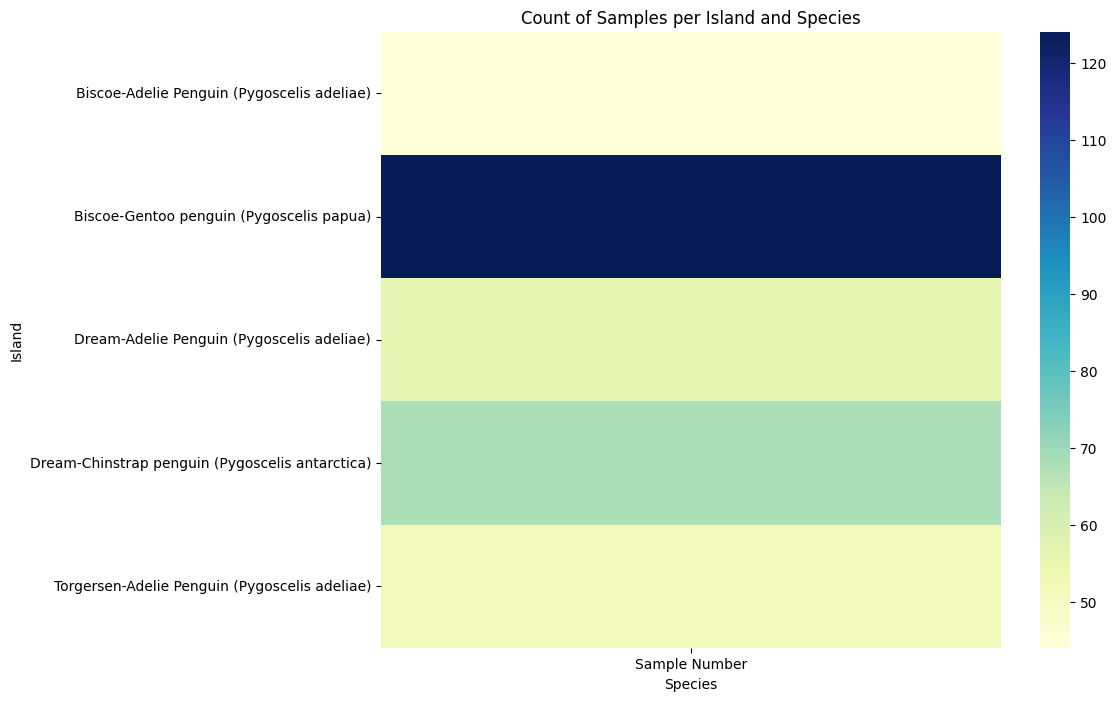

In [109]:
# Calculating and visualising the distribution of penguin populations across the three islands
island_df = df[['Island', 'Species', 'Sample Number']]
island_df = island_df.groupby(['Island', 'Species']).count()
island_df.head()

plt.figure(figsize=(10, 8))
sns.heatmap(island_df, cmap="YlGnBu")
plt.title('Count of Samples per Island and Species')
plt.xlabel('Species')
plt.ylabel('Island')
plt.show()